CNN

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print (tf. version)

<module 'tensorflow._api.v2.version' from 'C:\\Users\\advai\\AppData\\Local\\Programs\\Python\\Python312\\Lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [2]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag',
'Ankle boot']

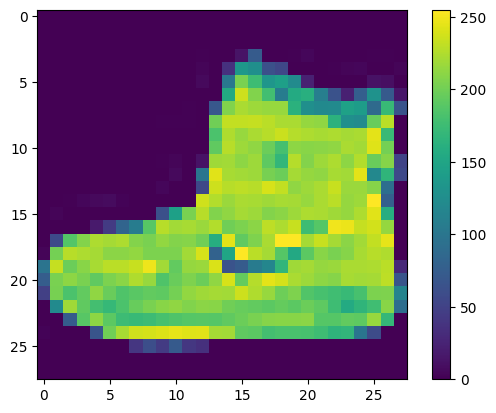

In [4]:
plt.figure()
plt.imshow(train_images[0]) 
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images / 255.0

test_images = test_images / 255.0

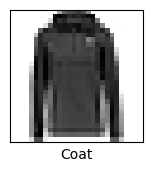

In [6]:
plt.figure(figsize=(10,10)) 
for i in range(25) :
    plt.subplot(5,5,1+1)
    plt.xticks([])
    plt.yticks([]) 
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [9]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7775 - loss: 0.6358
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8604 - loss: 0.3878
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.8747 - loss: 0.3415
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8854 - loss: 0.3144
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8910 - loss: 0.2934
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8981 - loss: 0.2753
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8991 - loss: 0.2689
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9064 - loss: 0.2561
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9055 - loss: 0.2540
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9152 - loss: 0.2310


In [27]:
test_loss, cnn_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', cnn_acc)

313/313 - 7s - 23ms/step - accuracy: 0.9072 - loss: 0.2654

Test accuracy: 0.9071999788284302


In [11]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

In [12]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [13]:
predictions[0]

array([3.10176190e-10, 4.25217560e-13, 2.94584253e-11, 1.33718115e-11,
       7.64793368e-11, 1.93495443e-03, 5.91608496e-09, 8.28734599e-03,
       9.51064916e-09, 9.89777744e-01], dtype=float32)

In [14]:
np.argmax(predictions[0])

9

In [15]:
test_labels[0]

9

In [16]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                          class_names[true_label]),
                                            color=color)

In [17]:
def plot_value_array(i, predictions_array, true_label):
    plt.xticks(range(10)) 
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777") 
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label[i]].set_color('blue')

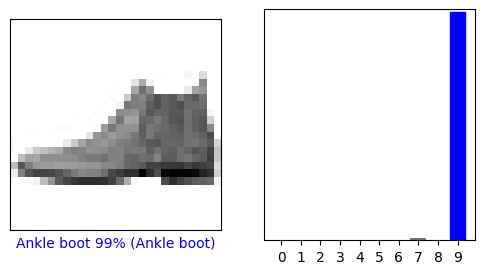

In [18]:
import matplotlib.pyplot as plt
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

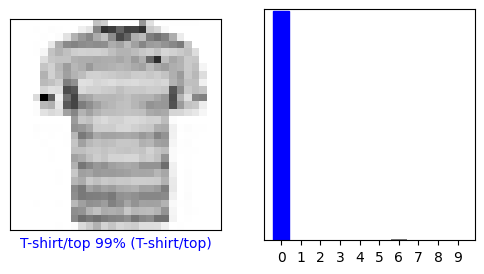

In [19]:
import matplotlib.pyplot as plt
i = 35
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

ALEX NET

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [21]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [22]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [23]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [25]:
 model = models.Sequential([
        layers.Conv2D(96, (3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(256, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dense(4096, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

In [26]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
model.fit(train_images, train_labels, epochs=2, batch_size=64)

Epoch 1/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 931s 988ms/step - accuracy: 0.7115 - loss: 0.7559
Epoch 2/2
938/938 ━━━━━━━━━━━━━━━━━━━━ 701s 732ms/step - accuracy: 0.8911 - loss: 0.2951


In [27]:
test_loss, alex_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', alex_acc)

313/313 - 111s - 356ms/step - accuracy: 0.0880 - loss: 2.3023

Test accuracy: 0.08799999952316284


GOOGLE NET

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [13]:
def inception_module(x, filters):
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)
    
    conv3x3_reduce = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = layers.Conv2D(filters[2], (3, 3), padding='same', activation='relu')(conv3x3_reduce)
    
    conv5x5_reduce = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = layers.Conv2D(filters[4], (5, 5), padding='same', activation='relu')(conv5x5_reduce)
    maxpool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    maxpool_proj = layers.Conv2D(filters[5], (1, 1), padding='same', activation='relu')(maxpool)
    
    concatenated = layers.concatenate([conv1x1, conv3x3, conv5x5, maxpool_proj], axis=-1)
    return concatenated

In [14]:
def googlenet():
    inputs = layers.Input(shape=(28, 28, 1))
    
    # First convolutional layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Second convolutional layer
    x = layers.Conv2D(64, (1, 1), padding='same', activation='relu')(x)
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Inception modules
    x = inception_module(x, filters=[64, 96, 128, 16, 32, 32])
    x = inception_module(x, filters=[128, 128, 192, 32, 96, 64])
    
    # Max pooling
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    
    # Flatten and fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(1024, activation='relu')(x)
    x = layers.Dropout(0.4)(x)
    outputs = layers.Dense(10, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    return model

In [15]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [16]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [17]:
train_images = train_images.reshape(-1, 28, 28, 1)
test_images = test_images.reshape(-1, 28, 28, 1)

In [18]:
model = googlenet()

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 147s 298ms/step - accuracy: 0.6646 - loss: 0.8732
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1249s 3s/step - accuracy: 0.8697 - loss: 0.3529
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 123s 262ms/step - accuracy: 0.8922 - loss: 0.2902
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 65s 98ms/step - accuracy: 0.9044 - loss: 0.2615
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9093 - loss: 0.2433
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 99ms/step - accuracy: 0.9178 - loss: 0.2207
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9251 - loss: 0.2044
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9278 - loss: 0.1912
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 98ms/step - accuracy: 0.9313 - loss: 0.1840
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 46s 97ms/step - accuracy: 0.9378 - loss: 0.1666


In [21]:
test_loss, google_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', google_acc)

313/313 - 7s - 21ms/step - accuracy: 0.9072 - loss: 0.2654

Test accuracy: 0.9071999788284302


In [30]:
import matplotlib.pyplot as plt

models = ['CNN', 'AlexNet', 'GoogLeNet']
accuracies = [cnn_acc, alex_acc, google_acc]

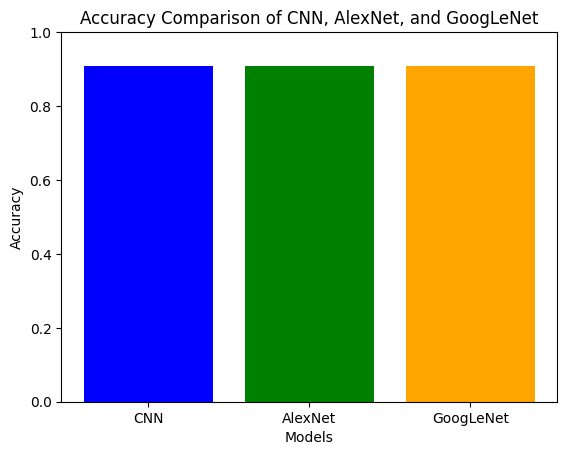

In [31]:
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of CNN, AlexNet, and GoogLeNet')
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for accuracy range
plt.show()